<a href="https://colab.research.google.com/github/kalnikos/Document-Classification-/blob/main/KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN model

In [22]:
import numpy as np
import pandas as pd
import pickle
from zipfile import ZipFile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
files = "/content/model_data.zip"

with ZipFile(files, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
## Read the different data parts
path_df = "/content/model_data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

path_X_train = "/content/model_data/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

path_X_test = "/content/model_data/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

path_y_train = "/content/model_data/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

path_y_test = "/content/model_data/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

In [4]:
print(X_train.shape)
print(X_test.shape)

(1080, 293)
(121, 293)


In [13]:
## Train a KNN model
from sklearn.neighbors import KNeighborsClassifier
K=6

knn_model = KNeighborsClassifier(n_neighbors = K)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [14]:
## Fit the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [16]:
## Predictions
y_pred = knn_model.predict(X_train)

print("Training set Accuracy: ", accuracy_score(y_train, y_pred))

Training set Accuracy:  0.8814814814814815


In [17]:
## Cross validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.77777778, 0.80555556, 0.85185185, 0.78703704, 0.80555556,
       0.82407407, 0.76851852, 0.75925926, 0.87962963, 0.81481481])

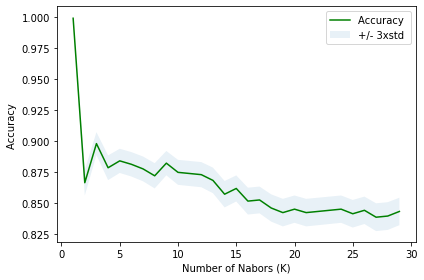

In [25]:
## Try different K 

Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    KNN= KNeighborsClassifier(n_neighbors = n)
    #Train Model and Predict  
    neigh = KNN.fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = accuracy_score(y_train, yhat)

    
    std_acc[n-1]=np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Minimum error:- 0.14049586776859505 at K = 6


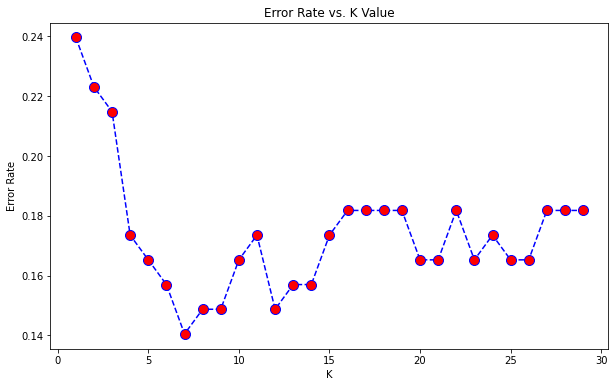

In [27]:
## Compute the error rate
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [28]:
## I will chose to work with 20 K neighbors
K = 20
knn_best = KNeighborsClassifier(n_neighbors=K)
knn_best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [29]:
## Fit the new model
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [30]:
## Predictions
y_pred = knn_best.predict(X_train)

print("Train set Accuracy", accuracy_score(y_train, y_pred))

Train set Accuracy 0.8453703703703703


In [32]:
## Test set Accuracy
y_test_pred = knn_best.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_test_pred))

Test set Accuracy: 0.8347107438016529


In [33]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.67      1.00      0.80        10
           2       0.86      0.86      0.86        14
           3       0.71      0.71      0.71        14
           4       0.90      0.60      0.72        15
           5       0.93      0.87      0.90        15
           6       0.96      1.00      0.98        23
           7       0.87      0.93      0.90        14

    accuracy                           0.83       121
   macro avg       0.83      0.83      0.82       121
weighted avg       0.84      0.83      0.83       121



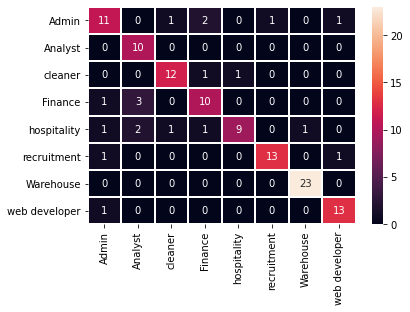

In [34]:
## Confusion matrix
encode = {'Admin':0, 'Analyst':1, 'cleaner':2, 'Finance':3, 'hospitality':4,
       'recruitment':5, 'Warehouse':6, 'web developer':7}
labels = [i for i in encode]
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [37]:
## Create a data frame with the model's training, test set accuracy
D = {
     'Model': 'KNN',
     'Train Set Accuracy': accuracy_score(y_train,knn_best.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, y_test_pred)
}

knn_df = pd.DataFrame(D, index=[0])
knn_df

,Model,Train Set Accuracy,Test Set Accuracy
0,KNN,0.84537,0.834711


In [39]:
## Save the model and the dataframe
## Save the model
with open('/content/model_data/best_knn.pickle', 'wb') as output:
    pickle.dump(knn_best, output)

## Save the data frame
with open('/content/model_data/knn_df.pickle', 'wb') as output:
  pickle.dump(knn_df, output)